# RecZilla-KNN Evaluation Pipeline

Here we test a RecZilla alg. selection pipeline using a simple KNN method, whcih works like this:
- derive meta-features for the new dataset
- find the dataset in our meta-dataset which is the nearest neighbor according to some metric
- find the alg. and hyperparameter set with the best performance, and select this (alg + hyperparam pair)

to evaluate this pipeline, we use leave-one-out split with each dataset family.



In [115]:
import pandas as pd
import numpy as np

TIME_FORMAT = "%Y%m%d_%H%M%S"


df = pd.read_csv("/Users/duncan/research/active_projects/reczilla/results/results.csv", sep=";")


/Users/duncan/miniconda3/envs/recsys/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (13,14,17,31,32,38,40,41,42,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
# gather dataset metafeatures, and put in dict
dataset_metafeatures = pd.read_csv("/Users/duncan/research/active_projects/reczilla/results/Metafeatures.csv")

# add col for dataset-split string

dataset_metafeatures.loc[:, "dataset_name"] = dataset_metafeatures["dataset_name"].apply(lambda x: x[:-6] if x.endswith("Reader") else x)
dataset_features_dict = {}
for i_row, row in dataset_metafeatures.iterrows():
    dataset_features_dict["splits-v3_" + row["dataset_name"] + "_" + row["split_name"]] = row.values[2:]


print(f"found metafeatures for {len(dataset_features_dict)} datasets:")
for d in dataset_features_dict.keys():
    print(d)


found metafeatures for 78 datasets:
splits-v3_AmazonAllBeauty_DataSplitter_leave_k_out
splits-v3_AmazonAllElectronics_DataSplitter_leave_k_out
splits-v3_AmazonAlternativeRock_DataSplitter_leave_k_out
splits-v3_AmazonAmazonFashion_DataSplitter_leave_k_out
splits-v3_AmazonAmazonInstantVideo_DataSplitter_leave_k_out
splits-v3_AmazonAppliances_DataSplitter_leave_k_out
splits-v3_AmazonAppsforAndroid_DataSplitter_leave_k_out
splits-v3_AmazonAppstoreforAndroid_DataSplitter_leave_k_out
splits-v3_AmazonArtsCraftsSewing_DataSplitter_leave_k_out
splits-v3_AmazonAutomotive_DataSplitter_leave_k_out
splits-v3_AmazonBaby_DataSplitter_leave_k_out
splits-v3_AmazonBabyProducts_DataSplitter_leave_k_out
splits-v3_AmazonBeauty_DataSplitter_leave_k_out
splits-v3_AmazonBlues_DataSplitter_leave_k_out
splits-v3_AmazonBooks_DataSplitter_leave_k_out
splits-v3_AmazonBuyaKindle_DataSplitter_leave_k_out
splits-v3_AmazonCDsVinyl_DataSplitter_leave_k_out
splits-v3_AmazonChristian_DataSplitter_leave_k_out
splits-v3_Am

In [117]:
# d = dict(dataset_metafeatures.iloc[0])

# for k, v in d.items():
#     print(k, v)

### gather all results

In [118]:
# slice by experiment name
df_expt = df.loc[df["experiment_name"].str.startswith("full-experiment-"), :]

# add a col for dataset-split names- this is unique to each dataset split, and is based on its gcloud filepath
df_expt.loc[:, "dataset_split_name"] = df_expt["original_split_path"].apply(lambda x: '_'.join(x.split('/')[-3:]))

df_expt.head()

/Users/duncan/miniconda3/envs/recsys/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/duncan/miniconda3/envs/recsys/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,alg_name,alg_seed,cutoff_list,dataset_name,exception,experiment_name,hyperparameters_source,num_samples,original_split_path,param_alpha,...,test_metric_USERS_IN_GT_cut_50,test_metric_USERS_IN_GT_cut_6,test_metric_USERS_IN_GT_cut_7,test_metric_USERS_IN_GT_cut_8,test_metric_USERS_IN_GT_cut_9,time,time_on_test,time_on_train,time_on_val,dataset_split_name
4,UserKNNCF_asymmetric,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40...",MovieTweetingsReader,NaN,full-experiment-knn-146,default,100,gs://reczilla-results/dataset-splits/splits-v3...,NaN,...,1.0,1.0,1.0,1.0,1.0,20220417_233953,114.638383,11.768501,115.430055,splits-v3_MovieTweetings_DataSplitter_leave_k_out
5,UserKNNCF_asymmetric,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40...",MovieTweetingsReader,NaN,full-experiment-knn-146,random_0,100,gs://reczilla-results/dataset-splits/splits-v3...,NaN,...,1.0,1.0,1.0,1.0,1.0,20220417_233953,124.220636,13.444535,123.385043,splits-v3_MovieTweetings_DataSplitter_leave_k_out
6,UserKNNCF_asymmetric,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40...",MovieTweetingsReader,NaN,full-experiment-knn-146,random_1,100,gs://reczilla-results/dataset-splits/splits-v3...,NaN,...,1.0,1.0,1.0,1.0,1.0,20220417_233953,115.785270,11.932769,115.417125,splits-v3_MovieTweetings_DataSplitter_leave_k_out
7,UserKNNCF_asymmetric,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40...",MovieTweetingsReader,NaN,full-experiment-knn-146,random_2,100,gs://reczilla-results/dataset-splits/splits-v3...,NaN,...,1.0,1.0,1.0,1.0,1.0,20220417_233953,123.379156,12.692332,123.481905,splits-v3_MovieTweetings_DataSplitter_leave_k_out
8,UserKNNCF_asymmetric,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40...",MovieTweetingsReader,NaN,full-experiment-knn-146,random_3,100,gs://reczilla-results/dataset-splits/splits-v3...,NaN,...,1.0,1.0,1.0,1.0,1.0,20220417_233953,123.355272,14.126628,123.627794,splits-v3_MovieTweetings_DataSplitter_leave_k_out


### Leave-one-out validation for KNN pipeline:
- for a fixed performance metric, and for each dataset split:
  - find the K=1 nearest dataset based on dataset meta-features
  - for the nearest dataset, find the K=1 best alg + hyperparam-set
  - return the best alg & hyperparam set 

each hyperparam set is identified using column "hyperparameters_source" (this is = "default" for the default param set, and "random_N" for random sample number N)

In [119]:
import itertools

metric_list = [
    "test_metric_NDCG_cut_5",
]

splits_list = list(df_expt["dataset_split_name"].unique())

print(f"found {len(splits_list)} splits")

# create distance metric. self-distance is \inf (1e10)
dataset_dist_array = np.zeros((len(splits_list), len(splits_list)))
for i, name_1 in enumerate(splits_list):
    for j, name_2 in enumerate(splits_list):
        if i == j:
            dataset_dist_array[i, i] = 1e10
        else:
            if name_1 not in dataset_features_dict:
                raise Exception(f"dataset not found in meta-dataset features: {name_1}")
            if name_2 not in dataset_features_dict:
                raise Exception(f"dataset not found in meta-dataset features: {name_2}")
            dist = np.linalg.norm(dataset_features_dict[name_1] - dataset_features_dict[name_2])
            dataset_dist_array[i, j] = dist
            dataset_dist_array[j, i]  = dist



found 22 splits


In [109]:
dataset_dist_array

array([[1.00000000e+10, 5.73943675e+05, 2.40055870e+05, 7.93435548e+05,
        7.77902297e+05, 7.12554785e+05, 6.11856441e+04, 7.69722000e+05,
        7.62753388e+05, 3.16745440e+06, 1.95725408e+05, 1.62842201e+07,
        9.87170727e+07, 7.84030167e+05, 7.77197776e+05, 5.15521405e+06,
        1.89167392e+07, 8.47886740e+05, 6.86560257e+06, 1.82798584e+05,
        2.52118278e+06, 9.02618406e+06],
       [5.73943675e+05, 1.00000000e+10, 3.40691295e+05, 4.59976016e+05,
        4.51163950e+05, 4.12097480e+05, 6.25464613e+05, 4.46536221e+05,
        4.30742227e+05, 3.53168561e+06, 5.08805189e+05, 1.67697954e+07,
        9.92029625e+07, 4.52348303e+05, 4.45189323e+05, 5.38486501e+06,
        1.94047447e+07, 1.37229188e+06, 7.35858821e+06, 7.45498794e+05,
        2.45765326e+06, 9.51738984e+06],
       [2.40055870e+05, 3.40691295e+05, 1.00000000e+10, 5.91679631e+05,
        5.76992302e+05, 5.13800234e+05, 2.91024817e+05, 5.69207973e+05,
        5.59498050e+05, 3.33327144e+06, 2.47757472e+05

In [136]:
### TODO: exclude neighbor datasets from the same family

# memoize to save some time
neighbor_dict = {}

# iterate over metric list
for metric_name in metric_list:

    ##########
    # first, generate ground truth. gather this in a dataframe. this is the row with the best (max) metric for each split
    ground_truth_list = []
    for i_split, split_name in enumerate(splits_list):

        df_tmp = df_expt.loc[df_expt["dataset_split_name"] == split_name, :].sort_values(by=metric_name, inplace=False, ascending=False)

        ground_truth_list.append(dict(df_tmp.iloc[0]))

    result_df = pd.DataFrame(ground_truth_list)
    assert len(result_df) == len(splits_list)

    # add placeholder cols
    result_df.loc[:, "selected_alg"] = None
    result_df.loc[:, "selected_hyperparams"] = None
    result_df.loc[:, "selected_alg_metric"] = None
    result_df.loc[:, "ground_truth_metric"] = result_df[metric_name]
    result_df.loc[:, "ground_truth_alg"] = result_df["alg_name"]


    ##########

    # loop over & evaluate all dataset splits
    for i_split, split_name in enumerate(splits_list):
        print(f"dataset split: {split_name}")

        df_split = df_expt.loc[df_expt["dataset_split_name"] == split_name, :]

        # find the K=1 dataset that is nearest to the split
        if split_name not in neighbor_dict:
            
            min_dist_idx = np.argmin(dataset_dist_array[:, i_split]) 
            neighbor_dict[split_name] = splits_list[min_dist_idx]
        
        neighbor_dataset = neighbor_dict[split_name]
        print(f"neighbor: {neighbor_dataset}")

        assert neighbor_dataset != split_name

        # # find the best (max metric) alg-hyperparam pair for the neighbor dataset
        df_nbr = df_expt.loc[df_expt["dataset_split_name"] == neighbor_dataset, :].copy()

        df_nbr.sort_values(by=metric_name, inplace=True, ascending=False)
        best_row = df_nbr.iloc[0].copy()
               
        # now get the performance of the alg+hyperparam pair on the evaluation split
        eval_rows = df_split.loc[(df_split["alg_name"] == best_row["alg_name"]) & (df_split["hyperparameters_source"] == best_row["hyperparameters_source"]), :]
        if len(eval_rows) == 0:
            print(f"WARNING: no match for alg: {best_row['alg_name']} hyperparams: {best_row['hyperparameters_source']}")
            eval_metric = None
        elif len(eval_rows) > 1:
            print(f"WARNING: MULTIPLE MATCHES for alg: {best_row['alg_name']} hyperparams: {best_row['hyperparameters_source']}")
        else:
            eval_metric = eval_rows.iloc[0][metric_name]

        result_df.at[i_split, "selected_alg"] = best_row["alg_name"]
        result_df.at[i_split, "selected_hyperparams"] = best_row["hyperparameters_source"]
        result_df.at[i_split, "selected_alg_metric"] = eval_metric

        # print(f"best alg (hyperparams) (metric): {best_row['alg_name']} ({best_row['hyperparameters_source']}) ({best_row[metric_name]})") # ({df_nbr.sample(1).iloc[0][metric_name]}")



dataset split: splits-v3_MovieTweetings_DataSplitter_leave_k_out
neighbor: splits-v3_MovielensHetrec2011_DataSplitter_leave_k_out
dataset split: splits-v3_BookCrossing_DataSplitter_leave_k_out
neighbor: splits-v3_Epinions_DataSplitter_leave_k_out
dataset split: splits-v3_Epinions_DataSplitter_leave_k_out
neighbor: splits-v3_MovieTweetings_DataSplitter_leave_k_out
dataset split: splits-v3_Frappe_DataSplitter_leave_k_out
neighbor: splits-v3_Wikilens_DataSplitter_leave_k_out
dataset split: splits-v3_FilmTrust_DataSplitter_leave_k_out
neighbor: splits-v3_Wikilens_DataSplitter_leave_k_out
dataset split: splits-v3_Movielens100K_DataSplitter_leave_k_out
neighbor: splits-v3_CiaoDVD_DataSplitter_leave_k_out
dataset split: splits-v3_MovielensHetrec2011_DataSplitter_leave_k_out
neighbor: splits-v3_MovieTweetings_DataSplitter_leave_k_out
dataset split: splits-v3_MarketBiasModCloth_DataSplitter_leave_k_out
neighbor: splits-v3_FilmTrust_DataSplitter_leave_k_out
dataset split: splits-v3_CiaoDVD_DataS

In [150]:
# how many algs are the same?
result_df[["alg_name", "selected_alg"]]

,alg_name,selected_alg
0,SLIM_BPR_Cython,ItemKNNCF_tversky
1,ItemKNNCF_cosine,ItemKNNCF_tversky
2,ItemKNNCF_tversky,SLIM_BPR_Cython
3,ItemKNNCF_asymmetric,ItemKNNCF_jaccard
4,ItemKNNCF_euclidean,ItemKNNCF_jaccard
5,ItemKNNCF_euclidean,P3alphaRecommender
6,ItemKNNCF_tversky,SLIM_BPR_Cython
7,SLIM_BPR_Cython,ItemKNNCF_euclidean
8,P3alphaRecommender,SLIM_BPR_Cython
9,ItemKNNCF_asymmetric,ItemKNNCF_jaccard


(array([1., 1., 0., 0., 0., 0., 0., 1., 2., 9.]),
 array([-0.14529843874816714, -0.13091136336864784, -0.1165242879891285,
        -0.1021372126096092, -0.08775013723008988, -0.07336306185057057,
        -0.05897598647105126, -0.044588911091531944, -0.030201835712012626,
        -0.01581476033249332, -0.0014276849529739968], dtype=object),
 <BarContainer object of 10 artists>)

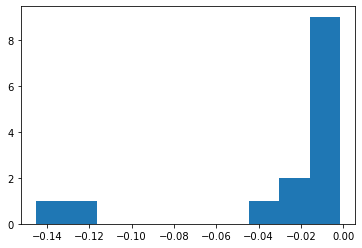

In [144]:
import matplotlib.pyplot as plt
plt.hist(result_df["selected_alg_metric"] - result_df["ground_truth_metric"])

In [146]:
# sum(result_df["selected_alg_metric"].isna())
sum(result_df["ground_truth_metric"].isna())


1

In [10]:
df_expt.loc[(df_expt["alg_name"] == "UserKNNCF_asymmetric") & (df_expt["hyperparameters_source"] == "random_10")]["param_topK"]

15       491.0
8953     491.0
16174    491.0
18805    491.0
28586    491.0
30121    491.0
34689    491.0
38861    491.0
42121    491.0
43648    491.0
43748    491.0
44068    491.0
47142    491.0
49822    491.0
51448    491.0
53374    491.0
54399    491.0
55314    491.0
58177    491.0
61647    491.0
Name: param_topK, dtype: float64